<a href="https://colab.research.google.com/github/Deepachowdhari/MyProjects/blob/main/Stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("TimeSeries.csv")

In [4]:
data.head()

,Date,Value
0,01-07-1991,3.526591
1,01-08-1991,3.180891
2,01-09-1991,3.252221
3,01-10-1991,3.611003
4,01-11-1991,3.565869


In [21]:
data.isnull().sum()

,0
Date,0
Value,0
log_Value,0


In [5]:
data.shape

(204, 2)

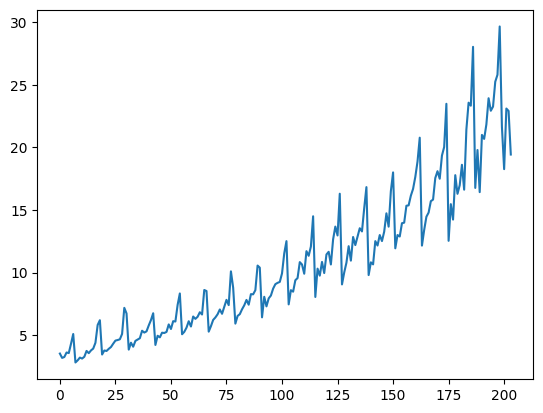

In [6]:
import matplotlib.pyplot as plt
plt.plot(data['Value'])
plt.show()

In [7]:
data['Date'].value_counts()

,count
Date,
01-07-1991,1
01-03-2003,1
01-05-2002,1
01-06-2002,1
01-07-2002,1
...,...
01-05-1997,1
01-06-1997,1
01-07-1997,1


In [8]:
data['Date'].min()

'01-01-1992'

In [9]:
data['Date'].max()

'01-12-2007'

In [14]:
data['log_Value']=np.log(data['Value']) #logarithmic


In [15]:
data['Value'].mean()

10.694429582156861

In [16]:
data['log_Value'].mean()

2.213122917927642

In [17]:
data.head()

,Date,Value,log_Value
0,01-07-1991,3.526591,1.260332
1,01-08-1991,3.180891,1.157161
2,01-09-1991,3.252221,1.179338
3,01-10-1991,3.611003,1.283986
4,01-11-1991,3.565869,1.271408


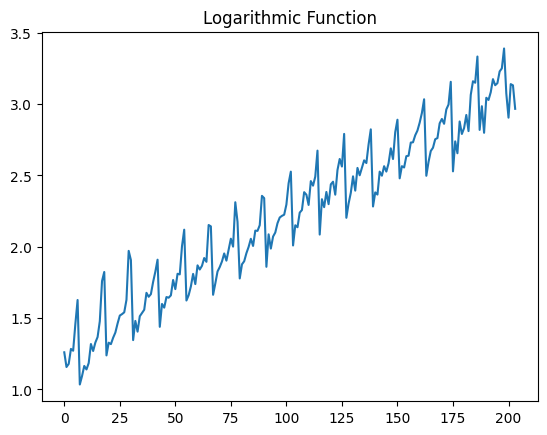

In [19]:
data['log_Value'].plot()
plt.title("Logarithmic Function")
plt.show()

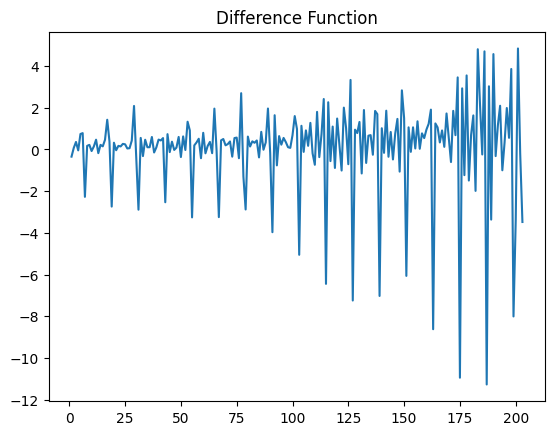

In [38]:
data['diff_value']=data['Value'].diff()
data['diff_value'].plot()
plt.title("Difference Function")
plt.show()

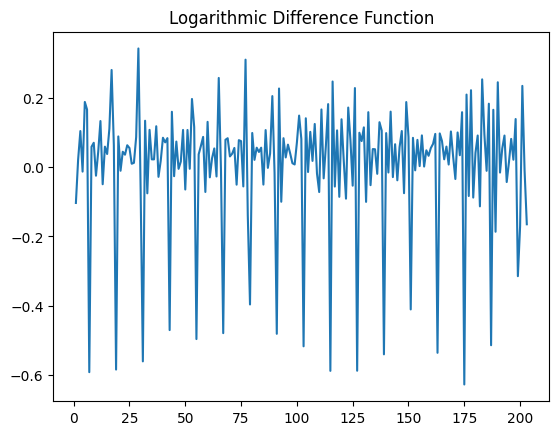

In [22]:
data['log_diff_value']=data['log_Value'].diff()
data['log_diff_value'].plot()
plt.title("Logarithmic Difference Function")
plt.show()

In [23]:
from  statsmodels.tsa.stattools import adfuller

In [33]:
def adf_test(value):
  result=adfuller(value)
  print(f"p-value:{result[1]}")
  if result[1]>0.05:
    print("The data is not Stationary")
  else:
    print("The data is Stationary")



In [34]:
result=adf_test(data['Value'])

p-value:1.0
The data is not Stationary


In [36]:
adf_test(data['log_Value'])

p-value:0.7573512901699067
The data is not Stationary


In [40]:
data.dropna(inplace=True)

In [41]:
adf_test(data['diff_value'])

p-value:0.11665341686468789
The data is not Stationary


In [42]:
adf_test(data['log_diff_value'])

p-value:0.00018133843740901967
The data is Stationary


In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

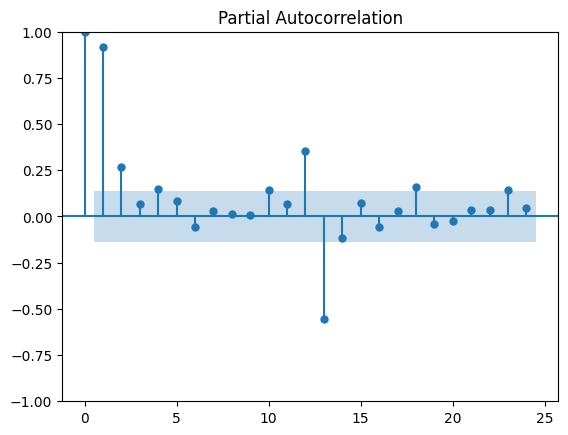

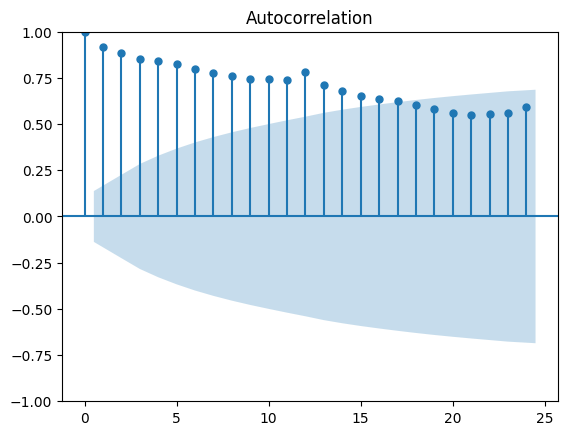

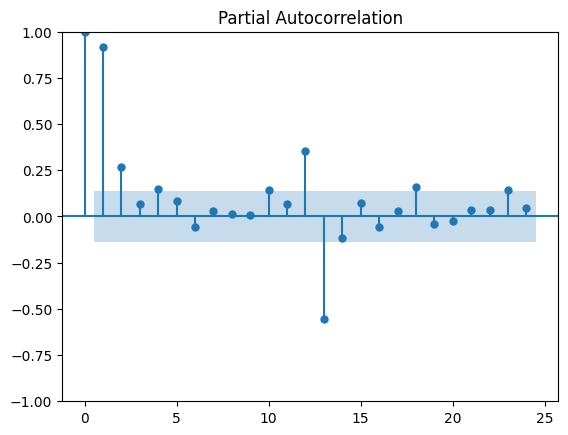

In [45]:
plot_acf(data['Value'])
plot_pacf(data['Value'])

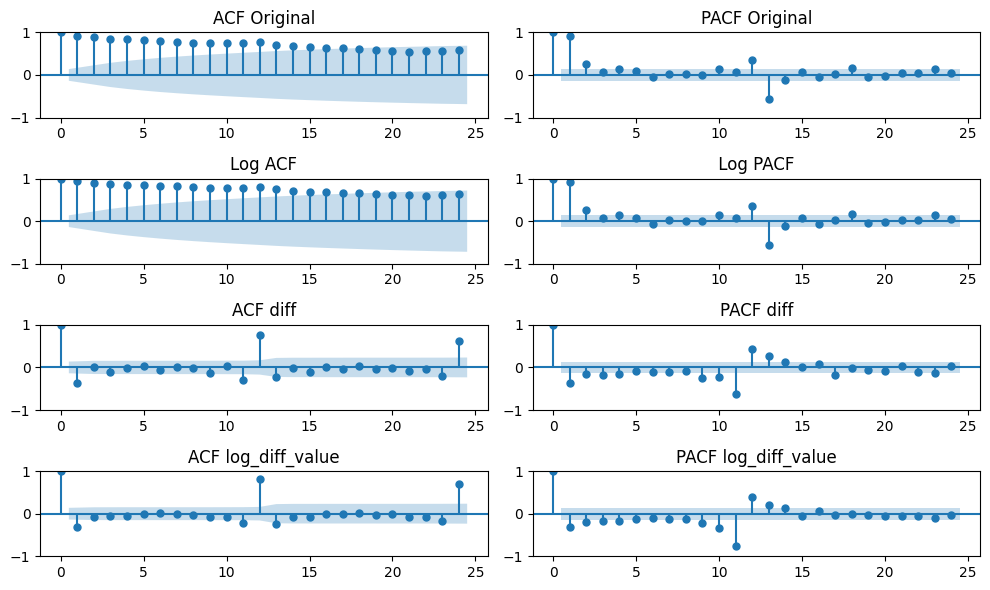

In [46]:
fig,axes=plt.subplots(4,2,figsize=(10,6))
plot_acf(data['Value'],ax=axes[0,0],title='ACF Original')
plot_pacf(data['Value'],ax=axes[0,1],title='PACF Original')

plot_acf(data['log_Value'],ax=axes[1,0],title='Log ACF')
plot_pacf(data['Value'],ax=axes[1,1],title=' Log PACF ')

plot_acf(data['diff_value'],ax=axes[2,0],title='ACF diff')
plot_pacf(data['diff_value'],ax=axes[2,1],title='PACF diff')


plot_acf(data['log_diff_value'],ax=axes[3,0],title='ACF log_diff_value')
plot_pacf(data['log_diff_value'],ax=axes[3,1],title='PACF log_diff_value')

plt.tight_layout()
plt.show()


In [47]:
result=adfuller(data['Value'])

In [48]:
result

(3.1544537427308663,
 1.0,
 15,
 187,
 {'1%': -3.465811691080702,
  '5%': -2.877123351472649,
  '10%': -2.5750770662586864},
 547.7785234816429)